In [1]:
import typing as tp
from matplotlib import pyplot as plt

import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse; rmse = lambda *x: mse(*x)**0.5
from tqdm.notebook import tqdm

from custome import DataFrameHandler, CrossValSampler, get_Xy, BLinearRegression

In [2]:
# Global const.
TRAIN_TO_ALL_DATA_RATION = 8 / 10
DROP_COLUMNS = ['sex', 'smoker', 'region']
CHECK_COLUMNS = ['female', 'male', 'southwest', 'southeast', 'northwest', 'northeast']
STATISTICS_COUNT_COLUMNS = [
    'age', 'bmi', 'children', 'charges', 'female', 'male', 'northeast', 'northwest', 'southeast', 'southwest'
]

In [3]:
data_handler = DataFrameHandler()

# Load all data and shuffle it.
df = pd.read_csv('insurance.csv')
df = df.sample(df.shape[0], random_state=7).reset_index(drop=True)

train_len = round(df.shape[0] * TRAIN_TO_ALL_DATA_RATION)

# Devide all data to train/test parts.
train_df = df.iloc[:train_len]
test_df = df.iloc[train_len:]

# Prepare data.
train_df = data_handler.prepare_dataset(train_df, DROP_COLUMNS, CHECK_COLUMNS)
train_statistics = data_handler.count_statistics(train_df, STATISTICS_COUNT_COLUMNS)
train_df = data_handler.normalize_dataset(train_df, train_statistics)

test_df = data_handler.prepare_dataset(test_df, DROP_COLUMNS, CHECK_COLUMNS)
test_df = data_handler.normalize_dataset(test_df, train_statistics)

In [4]:
X, y = get_Xy(train_df, target_name="charges")

In [6]:
train_val_sampler = CrossValSampler(X, y, val_size=75)

In [7]:
history = []
for train, val in tqdm(train_val_sampler, total=train_val_sampler.folds_num):
    X_train, y_train = train
    X_val, y_val = val
    model = BLinearRegression(5000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = rmse(y_val, y_pred)
    history.append(score)

  0%|          | 0/14 [00:00<?, ?it/s]

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 2 seconds.
There were 58 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5720231528114677, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 1 seconds.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5624939544437663, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.8838496583256902, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.887830686602527, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 9 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 8 seconds.
The acceptance probability does not match the target. It is 0.8948610113336137, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 9 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 1 seconds.
There were 100 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4391838851000721, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 8 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 70 tune and 200 draw iterations (70 + 200 draws total) took 6 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [9]:
import json

with open('history_classic.json', 'r') as f:
    history_classic = json.load(f)

mean RMSE of baysian model: 0.944744


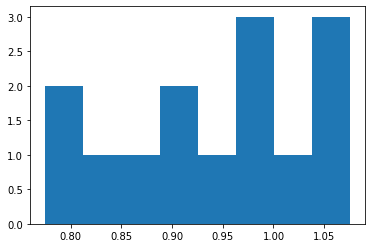

In [10]:
plt.hist(history, bins=8)
print('mean RMSE of baysian model: %4f' % np.mean(history))

In [11]:
import scipy 

print(scipy.stats.ttest_rel(history, history_classic), end='\n\n')
print('{:.4}% scores of bayesian model less than classic one!'.format(
        100 * np.mean([history[i] < history_classic[i] for i in range(14)])
    ))

Ttest_relResult(statistic=-1.5374851041023396, pvalue=0.14815142983821375)

64.29% scores of bayesian model less than classic one!


In [12]:
train_val_sampler = CrossValSampler(X, y, val_size=300)

train, val = train_val_sampler()
X_train, y_train = train
X_val, y_val = val

model = BLinearRegression(draws=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
rmse(y_val, y_pred)

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 462 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


0.9340351419755241

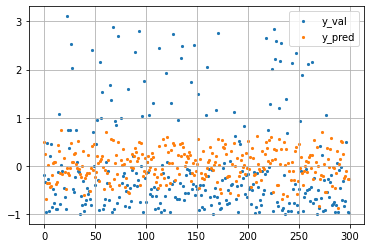

In [13]:
plt.scatter(range(len(y_val)), y_val, 4.5, label='y_val')
plt.scatter(range(len(y_val)), y_pred, 4.5, label='y_pred')
plt.legend()
plt.grid();

In [14]:
X_test, y_test = get_Xy(test_df, target_name="charges")

In [15]:
model = BLinearRegression(draws=5000)
model.fit(X, y)

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 544 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [25]:
y_pred = model.predict(X_test)

In [26]:
rmse(y_test, y_pred)  # Current model (bayesian) score.

0.8819402799440451

In [27]:
with open('classic_y_test_prediction.json', 'r') as f:
    y_classic_pred = np.array(json.load(f))

In [28]:
rmse(y_test, y_classic_pred)  # Classic linear model (from sklearn) score.

0.8819350790631854

In [29]:
abs_diff_for_each = np.abs(y_test - y_pred)
abs_diff_for_each__classic = np.abs(y_test - y_classic_pred)

scipy.stats.ttest_rel(
    abs_diff_for_each,
    abs_diff_for_each__classic
)

Ttest_relResult(statistic=-0.7437779462266995, pvalue=0.45766484342107416)

In [30]:
print('{:.4}% scores of bayesian model less than classic one!'.format(
    np.mean(abs_diff_for_each < abs_diff_for_each__classic) * 100
))

52.99% scores of bayesian model less than classic one!
